# Download the dataset

In [ ]:
!gdown 1A0lMLLg-NuYoSQYKwrWoMbYA1T6eO1nH

Downloading...
From (original): https://drive.google.com/uc?id=1A0lMLLg-NuYoSQYKwrWoMbYA1T6eO1nH
From (redirected): https://drive.google.com/uc?id=1A0lMLLg-NuYoSQYKwrWoMbYA1T6eO1nH&confirm=t&uuid=91e054fa-811a-43d9-8e1d-a142011e5681
To: /content/utils.py
100% 745/745 [00:00<00:00, 2.31MB/s]


# Import the necessary libraries

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt

import numpy as np

from sklearn.metrics import precision_score, recall_score

from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


from utils import *

# Discover the data

In [ ]:
train_images, train_labels, val_images, val_labels, test_images, test_labels = load_data(size='28')

In [ ]:
print(f'The shape of Training images: {train_images.shape}')
print(f'The shape of Training labels: {train_labels.shape}\n')
print(f'The shape of Validation images: {val_images.shape}')
print(f'The shape of Validation labels: {val_labels.shape}\n')
print(f'The shape of Test images: {test_images.shape}')
print(f'The shape of Test labels: {test_labels.shape}')

The shape of Training images: (7007, 28, 28, 3)
The shape of Training labels: (7007, 1)

The shape of Validation images: (1003, 28, 28, 3)
The shape of Validation labels: (1003, 1)

The shape of Test images: (2005, 28, 28, 3)
The shape of Test labels: (2005, 1)


In [ ]:
print(f'The number of class 0 (akiec): {sum(train_labels == 0).item():3}')
print(f'The number of class 1 (bcc): {sum(train_labels == 1).item():5}')
print(f'The number of class 2 (bkl): {sum(train_labels == 2).item():5}')
print(f'The number of class 3 (df): {sum(train_labels == 3).item():5}')
print(f'The number of class 4 (nv): {sum(train_labels == 4).item():6}')
print(f'The number of class 5 (mel): {sum(train_labels == 5).item():6}')
print(f'The number of class 6 (vasc): {sum(train_labels == 6).item():3}')

The number of class 0 (akiec): 228
The number of class 1 (bcc):   359
The number of class 2 (bkl):   769
The number of class 3 (df):    80
The number of class 4 (nv):    779
The number of class 5 (mel):   4693
The number of class 6 (vasc):  99


# PART 1: Preprocessing

In [ ]:
# Normalize images
train_images = train_images / 255.0
val_images = val_images / 255.0
test_images = test_images / 255.0

# PART 2: Build CNN Model

In [ ]:
# Initialize the model
model = Sequential()

# Add convolutional layers
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 3)))
model.add(Conv2D(64, (3, 3), activation='relu'))

# Add pooling layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output
model.add(Flatten())

# Add fully connected layers
model.add(Dense(128, activation='relu'))
model.add(Dense(7, activation='softmax'))  # 7 classes for skin diseases

# Print model summary
model.summary()


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        896       
                                                                 
 conv2d_3 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 12, 64)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 9216)              0         
                                                                 
 dense_2 (Dense)             (None, 128)               1179776   
                                                                 
 dense_3 (Dense)             (None, 7)                 903       
                                                      

# PART 3: Compile the Model

In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# PART 4: Train the Model

In [ ]:
# Define callbacks (optional)
callbacks = [
    ModelCheckpoint("best_model.h5", monitor='val_loss', save_best_only=True),
    EarlyStopping(monitor='val_loss', patience=5, verbose=1)
]

# Set batch size
batch_size = 32

# Set number of epochs
epochs = 20

# Start training your model
history = model.fit(train_images, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    validation_data=(val_images, val_labels),
                    callbacks=callbacks)


Epoch 1/20
219/219 [==============================] - 22s 96ms/step - loss: 1.1681 - accuracy: 0.6679 - val_loss: 1.1706 - val_accuracy: 0.6690
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


219/219 [==============================] - 20s 90ms/step - loss: 1.1344 - accuracy: 0.6698 - val_loss: 1.1351 - val_accuracy: 0.6690
Epoch 3/20
219/219 [==============================] - 21s 98ms/step - loss: 1.1361 - accuracy: 0.6698 - val_loss: 1.1323 - val_accuracy: 0.6690
Epoch 4/20
219/219 [==============================] - 20s 91ms/step - loss: 1.1107 - accuracy: 0.6698 - val_loss: 1.0903 - val_accuracy: 0.6690
Epoch 5/20
219/219 [==============================] - 21s 97ms/step - loss: 1.0517 - accuracy: 0.6698 - val_loss: 1.0201 - val_accuracy: 0.6690
Epoch 6/20
219/219 [==============================] - 20s 92ms/step - loss: 1.0086 - accuracy: 0.6693 - val_loss: 0.9952 - val_accuracy: 0.6690
Epoch 7/20
219/219 [==============================] - 23s 104ms/step - loss: 0.9812 - accuracy: 0.6696 - val_loss: 0.9764 - val_accuracy: 0.6700
Epoch 8/20
219/219 [==============================] - 19s 88ms/step - loss: 0.9662 - accuracy: 0.6725 - val_loss: 0.9554 - val_accuracy: 0.6700
Ep

# PART 5: Visualize the performance

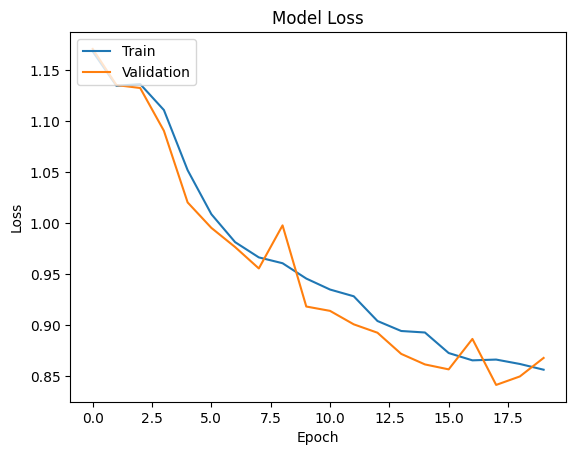

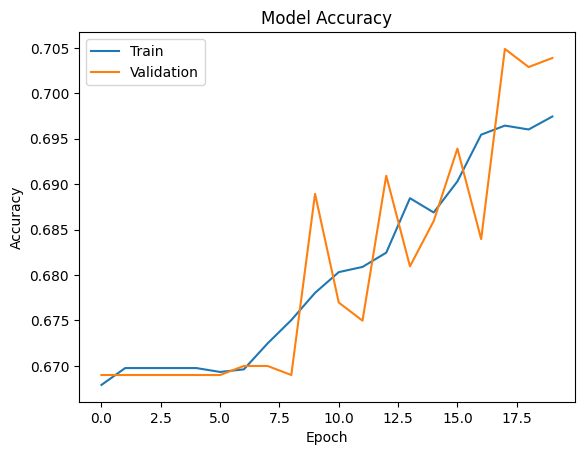

In [ ]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('loss_plot.png')
plt.show()

# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.savefig('accuracy_plot.png')
plt.show()

# PART 6: Evaluate the model on test set

In [ ]:
test_loss, test_accuracy = model.evaluate(test_images, test_labels, batch_size=batch_size)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Predict classes for test data
y_pred = model.predict(test_images)

# Convert predicted probabilities to class labels
y_pred_classes = np.argmax(y_pred, axis=1)

precision = precision_score(test_labels, y_pred_classes, average='weighted')
recall = recall_score(test_labels, y_pred_classes, average='weighted')

print("Precision:", precision)
print("Recall:", recall)

63/63 [==============================] - 1s 23ms/step - loss: 0.8633 - accuracy: 0.7062
Test Loss: 0.8632937669754028
Test Accuracy: 0.7062343955039978
63/63 [==============================] - 1s 22ms/step
Precision: 0.6641951837031825
Recall: 0.7062344139650872


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
